In [1]:
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
%cd ../scripts/
import sys
import os
sys.path.append("../")
sys.path.append("../Modules")
import analysis

/home/drfrbc/Neural-Modeling/scripts


In [3]:
# Initialize a dictionary to store models
models = {}

# Path for Ben's model
ben_base_path = "L5BaselineResults/"

# Load data for 'ben' model
models['ben'] = {
    'v': np.array(h5py.File(ben_base_path + 'v_report.h5', 'r')['report']['biophysical']['data'][:50000,:]),
    # 'hva': np.array(h5py.File(ben_base_path + 'Ca_HVA.ica_report.h5', 'r')['report']['biophysical']['data']),
    # 'lva': np.array(h5py.File(ben_base_path + 'Ca_LVAst.ica_report.h5', 'r')['report']['biophysical']['data']),
    # 'ih': np.array(h5py.File(ben_base_path + 'Ih.ihcn_report.h5', 'r')['report']['biophysical']['data']),
    # 'nmda': np.array(h5py.File(ben_base_path + 'inmda_report.h5', 'r')['report']['biophysical']['data']),
    # 'na': np.array(h5py.File(ben_base_path + 'NaTa_t.gNaTa_t_report.h5', 'r')['report']['biophysical']['data']),
    'spktimes': h5py.File(ben_base_path + 'spikes.h5', 'r')['spikes']['biophysical']['timestamps'][:],
    'spkinds': np.sort((h5py.File(ben_base_path + 'spikes.h5', 'r')['spikes']['biophysical']['timestamps'][:] * 10).astype(int)),
    # 'na_df': pd.read_csv(ben_base_path + 'na.csv'),
    # 'ca_df': pd.read_csv(ben_base_path + 'ca.csv'),
    # 'nmda_df': pd.read_csv(ben_base_path + 'nmda.csv')
}

In [4]:
# Path for the refactored model 
sim_directory = '/home/drfrbc/Neural-Modeling/scripts/2025-01-23-11-31-BenSynapses_testing_depth_of_mod_more_seeds/Complex_InhGmaxApic7.1_InhGmaxDend0.0016_SomaGmax0.0025_ExcGmax-1.0351_Np4444_RhythDepth0'
sim_directory = '/home/drfrbc/Neural-Modeling/scripts/2025-02-11-10-01-BenSynapses_testing_depth_of_mod_more_seeds/Complex_Np5000'
sim_directory = '/home/drfrbc/Neural-Modeling/scripts/2025-02-11-10-27-BenSynapses_testing_depth_of_mod_more_seeds/Complex_Np5000'
sim_directory = '/home/drfrbc/Neural-Modeling/scripts/2025-02-11-10-51-BenSynapses_testing_depth_of_mod_more_seeds/sta_Complex_BasalExcScale1.5000_BasalExcScale0.7000_Np5000'
sim_directory = '/home/drfrbc/Neural-Modeling/scripts/2025-02-11-11-02-testing_new_weights/sta_Complex_BasalExcScale1.7000_BasalExcScale0.5000_Np5000'
sim_directory = '/home/drfrbc/Neural-Modeling/scripts/2025-02-11-11-02-testing_new_weights/sta_Complex_BasalExcScale1.7000_BasalExcScale0.7000_Np5000'
sim_directory = '/home/drfrbc/Neural-Modeling/scripts/2025-02-11-11-45-testing_new_weights_revert_release_probs_and_scales/tuning_Complex_Np5000'
sim_directory = '/home/drfrbc/Neural-Modeling/scripts/2025-02-11-12-20-testing_new_weights_revert_release_probs_and_scales/tuning_Complex_Np5000'
sim_directory = '/home/drfrbc/Neural-Modeling/scripts/2025-02-11-12-48-testing_scale_exc/tuning_Complex_BasalExcScale1.3000_BasalExcScale0.7000_Np5000'
sim_directory = '/home/drfrbc/Neural-Modeling/scripts/2025-02-11-13-25-testing_scale_exc/tuning_Complex_BasalExcScale1.3000_ApicalExcScale0.9000_Np5000'
sim_directory = '/home/drfrbc/Neural-Modeling/scripts/2025-02-11-14-01-testing_scale_exc/tuning_Complex_BasalExcScale1.3000_ApicalExcScale0.7000_Np5000'

# increased apical inh
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-02-11-14-38-testing_scale_exc/tuning_Complex_ApicalExcScale0.8000_ExcClip0-3_{'inhBasal', 'inhApic'}distal_apic-(5.614, 0.33896)_distal_basal-(2.10525, 0.08474)_Np5000"

# decreased max exc
# sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-02-11-14-38-testing_scale_exc/tuning_Complex_ApicalExcScale0.8000_ExcClip0-3_{'inhBasal', 'inhApic'}distal_apic-(2.807, 0.16948)_distal_basal-(2.10525, 0.08474)_Np5000"

sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-02-11-15-41-testing_increasing_apic_inh/tuning_Complex_Np5000"

sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-02-13-09-51-increase_apicInh1x_increasebasalExc0point1x_again/tuning_Complex_Np5000"

# 100% modulation
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-02-13-12-46-measuring_across_rhyths_across_seeds/sta_Complex_DepthPeriInh1_DepthDistalInh1_Np55555555"

# 10% modulation
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-02-13-12-46-measuring_across_rhyths_across_seeds/sta_Complex_DepthPeriInh0.1000_DepthDistalInh0.1000_Np55555555"

sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-02-13-12-46-measuring_across_rhyths_across_seeds/sta_Complex_DepthPeriInh0_DepthDistalInh0_Np5000"

# no modulation, corrected synapse weights
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-02-28-11-50-testing_syn_dictionaries/tuning_Complex_Np5000"

# adjust trunk exc syn density to 1/8th
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-02-28-12-12-testing_syn_dictionaries/tuning_Complex_Np5000"

# adjust apical exc syn densities to 1/2
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-02-28-12-33-testing_syn_dictionaries/tuning_Complex_Np5000"

# adjust apical exc syn densities to 1/8
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-02-28-12-54-tuning_syn_densities/tuning_Complex_Np5000"

# adjust tuft inh to 1.25x and trunk inh to 1.5x
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-02-28-13-12-tuning_syn_densities/tuning_Complex_Np5000"

sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-02-28-14-04-tuning_syn_densities/tuning_Complex_Np5000"

sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-02-28-14-14-tuning_syn_densities/tuning_Complex_Np5000"

sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-02-28-14-44-tuning_syn_densities/tuning_Complex_Np5000"

sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-02-28-16-43-tuning_syn_densities/tuning_Complex_Np5000"

sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-02-28-16-54-tuning_syn_densities/tuning_Complex_Np5000"

sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-03-20-11-tuning_syn_densities/tuning_Complex_Np5000"

sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-04-14-13-tuning_syn_densities/tuning_Complex_Np5000"

sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-12-11-11-checking_syn_density_tuning/tuning_Complex_Np5000"

sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-12-11-28-checking_syn_density_tuning/tuning_Complex_Np5000"

sim_directory = '/home/drfrbc/Neural-Modeling/scripts/2025-03-12-12-42-checking_syn_density_tuning/tuning_Complex_Np5000'

sim_directory = '/home/drfrbc/Neural-Modeling/scripts/2025-03-12-13-20-checking_syn_density_tuning/tuning_Complex_Np5000'

sim_directory = '/home/drfrbc/Neural-Modeling/scripts/2025-03-12-13-35-checking_syn_density_tuning/tuning_Complex_Np5000'

sim_directory = '/home/drfrbc/Neural-Modeling/scripts/2025-03-12-13-52-checking_syn_density_tuning/tuning_Complex_Np5000'

sim_directory = '/home/drfrbc/Neural-Modeling/scripts/2025-03-12-14-14-checking_syn_density_tuning/tuning_Complex_Np5000'

sim_directory = '/home/drfrbc/Neural-Modeling/scripts/2025-03-12-14-29-checking_syn_density_tuning/tuning_Complex_Np5000'

sim_directory = '/home/drfrbc/Neural-Modeling/scripts/2025-03-12-14-50-checking_syn_density_tuning/tuning_Complex_Np5000'

sim_directory = '/home/drfrbc/Neural-Modeling/scripts/2025-03-12-15-05-checking_syn_density_tuning/tuning_Complex_Np5000'

sim_directory = '/home/drfrbc/Neural-Modeling/scripts/2025-03-12-15-05-checking_syn_density_tuning/tuning_Complex_Np5000'

sim_directory = '/home/drfrbc/Neural-Modeling/scripts/2025-03-13-09-57-checking_syn_density_tuning/tuning_Complex_Np5000'

sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-13-10-41-checking_syn_density_tuning/tuning_Complex_Np5000"

sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-13-10-53-checking_syn_density_tuning/tuning_Complex_Np5000"

# remove nexus synapses
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-13-11-12-checking_syn_density_tuning/tuning_Complex_Np5000"

# add nexus inh synapses
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-13-11-25-checking_syn_density_tuning/tuning_Complex_Np5000"

sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-13-11-36-checking_syn_density_tuning/tuning_Complex_Np5000"

sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-13-11-52-checking_syn_density_tuning/tuning_Complex_Np5000"
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-13-12-01-checking_syn_density_tuning/tuning_Complex_Np5000"

sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-13-14-26-checking_syn_density_tuning/tuning_Complex_Np5000"
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-13-15-12-checking_syn_density_tuning/tuning_Complex_Np5000"
sim_directory ="/home/drfrbc/Neural-Modeling/scripts/2025-03-14-08-30-checking_syn_density_tuning/tuning_Complex_Np5000"
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2025-03-14-08-40-checking_syn_density_tuning/tuning_Complex_Np5000"
#'2024-09-06-10-33-43-TuningBenInhSynapses/Complex_InhGmaxApic5.0_InhGmaxDend0.005_SomaGmax0.001_ExcGmax-1.0351_Np1000'
#'2024-09-05-16-45-46-TuningBenInhSynapses/Complex_InhGmaxApic4.5_InhGmaxDend0.007_SomaGmax0.001_ExcGmax-1.0351_Np1000'
#'2024-09-05-13-02-34-TuningBenInhSynapses/Complex_InhGmaxApic3.6_InhGmaxDend0.009_SomaGmax0.001_ExcGmax-1.0351_Np1000'
#'2024-09-04-15-32-57-TuningBenInhSynapses/Complex_InhGmaxApic2.2_InhGmaxDend0.009_SomaGmax0.003_ExcGmax-1.0351_Np1000'
#'2024-08-29-11-36-26-TuningSynapses_AfterUpdateExcRates_finalAdjustments/Complex_InhGmaxApic206.0_InhGmaxDend7.2_SomaGmax6.0_ExcGmax-1.0351_Np1000'
#Complex_InhGmaxApic150.0_InhGmaxDend1.0_SomaGmax9.0_ExcGmax-1.0351_Np1000'
#'2024-08-26-17-50-00-TuningSynapses_AfterUpdateExcRates_HighApicAndSomaInh/Complex_InhGmaxApic115.0_InhGmaxDend3.1_SomaGmax10.0_ExcGmax-1.0351_Np1000'
#'2024-08-26-10-00-53-TuningSynapses_AfterUpdateExcRates/Complex_InhGmaxApic10.1_InhGmaxDend3.2_SomaGmax4.1_ExcGmax-1.0351_Np1000'
#'2024-08-23-15-05-35-TuningSynapses_finalSims/Complex_InhGmaxApic6.9_InhGmaxDend0.1_SomaGmax2.3_ExcGmax-1.0351_Np1000'
#'2024-08-19-15-18-27-TuningSynapses_finalSims/Complex_InhGmaxApic6.9_InhGmaxDend0.1_SomaGmax2.3_ExcGmax-1.0351_Np1000'
#Complex_InhGmaxApic7.5_InhGmaxDend0.6_SomaGmax4.0_ExcGmax-1.0351_Np1000'
#'2024-08-18-23-09-06-TuningSynapses_finalSims/Complex_InhGmaxApic6.2_InhGmaxDend1.0_SomaGmax2.3_ExcGmax-1.0351_Np1000'
#'2024-08-18-13-30-55-TuningSynapses_finalSims/Complex_InhGmaxApic6.2_InhGmaxDend1.0_SomaGmax2.3_ExcGmax-1.0351_Np1000'
#Complex_InhGmaxApic4.2_InhGmaxDend2.4_SomaGmax2.0_ExcGmax-1.0351_Np1000
#Complex_InhGmaxApic4.0_InhGmaxDend2.0_SomaGmax1.8_ExcGmax-1.0351_Np1000'
#'2024-08-16-10-47-53-TuningSynapses_finalSims/Complex_InhGmaxApic5.0_InhGmaxDend2.4_SomaGmax2.1_ExcGmax-1.0351_Np1000'
#Complex_InhGmaxApic4.4_InhGmaxDend2.2_SomaGmax2.0_ExcGmax-1.0351_Np1000'
#Complex_InhGmaxApic4.4_InhGmaxDend2.2_SomaGmax2.0_ExcGmax-1.0351_Np1000
#'2024-08-14-22-02-42-TuningSynapses_finalSims/Complex_InhGmaxApic3.4_InhGmaxDend2.0_SomaGmax0.9_ExcGmax-1.0351_Np1000'
#'2024-08-14-20-38-05-TuningSynapses_finalSims/Complex_InhGmaxApic3.0_InhGmaxDend2.0_SomaGmax0.55_ExcGmax-1.0351_Np1000'
#'2024-08-14-20-38-05-TuningSynapses_finalSims/Complex_InhGmaxApic3.2_InhGmaxDend2.4_SomaGmax0.4_ExcGmax-1.0351_Np1000'
#'2024-08-14-20-38-05-TuningSynapses_finalSims/Complex_InhGmaxApic2.7_InhGmaxDend2.4_SomaGmax0.4_ExcGmax-1.0351_Np1000'
#Complex_InhGmaxApic3.2_InhGmaxDend2.4_SomaGmax0.4_ExcGmax-1.0351_Np1000'
#'2024-08-14-20-38-05-TuningSynapses_finalSims/Complex_InhGmaxApic2.6_InhGmaxDend2.0_SomaGmax0.55_ExcGmax-1.0351_Np1000'
#2024-08-14-20-38-05-TuningSynapses_finalSims/Complex_InhGmaxApic3.0_InhGmaxDend2.0_SomaGmax0.55_ExcGmax-1.0351_Np1000'
#'2024-08-14-20-08-53-TuningSynapses_finalSims/Complex_InhGmax2.4_SomaGmax0.4_ExcGmax-1.0351_Np1000/'
#'2024-08-14-19-33-53-TuningSynapses_ManySims/Complex_InhGmax2.4_SomaGmax0.4_ExcGmax-1.0351_Np1000/'
#'2024-08-14-16-42-45-TuningSynapses_ManySims/Complex_InhGmax2.4_SomaGmax0.4_ExcGmax-1.0351_Np1000/' # this one was decent I tihink
#'2024-08-13-18-53-06-TuningSynapses_reduceNA_shiftExcGmaxBy20Percent/Complex_Np5'
#'2024-08-13-18-24-09-TuningSynapses_reduceNA_shiftExcGmaxBy20Percent/Complex_Np5'
#'2024-08-13-16-34-16-TuningSynapses_reduceNA_shiftExcGmaxBy20Percent/Complex_Np5'
#'2024-08-13-16-00-54-TuningSynapses_reduceNA_shiftExcGmaxBy20Percent/Complex_Np5'
#'2024-08-13-15-40-48-TuningSynapses_reduceNA_shiftExcGmaxBy20Percent/Complex_Np5'

#2024-08-13-15-04-15-TuningSynapses_reduceNA_shiftExcGmaxBy20Percent/Complex_Np5'
#'2024-08-13-08-20-38-TuningSynapses_reduceNA_shiftExcGmaxBy20Percent/Complex_Np5'

#"/home/drfrbc/Neural-Modeling/scripts/2024-08-02-08-31-54-STA/Complex_Np5"
# /home/drfrbc/Neural-Modeling/scripts/2024-08-12-15-16-33-TuningSynapses_shiftExcGmaxBy10Percent
models['refactored'] = {
    'v': analysis.DataReader.read_data(sim_directory, "v").T,
    # 'hva': analysis.DataReader.read_data(sim_directory, "ica_Ca_HVA").T,
    # 'lva': analysis.DataReader.read_data(sim_directory, "ica_Ca_LVAst").T,
    # 'ih': analysis.DataReader.read_data(sim_directory, "ihcn_Ih").T,
    # 'nmda': analysis.DataReader.read_data(sim_directory, "i_NMDA").T,
    # 'na': analysis.DataReader.read_data(sim_directory, "gNaTa_t_NaTa_t").T,
    'spktimes': analysis.DataReader.read_data(sim_directory, "soma_spikes")[0][:],
    'spkinds': np.sort((analysis.DataReader.read_data(sim_directory, "soma_spikes")[0][:] * 10).astype(int)),
    # 'na_df': pd.read_csv(os.path.join(sim_directory, 'na.csv')),
    # 'ca_df': pd.read_csv(os.path.join(sim_directory, 'ca.csv')),
    # 'nmda_df': pd.read_csv(os.path.join(sim_directory, 'nmda.csv'))
}

--No graphics will be displayed.


In [5]:
parameters = analysis.DataReader.load_parameters(sim_directory)

In [6]:
# Load segment data for both models
segs_ben = pd.read_csv(ben_base_path + 'Segments.csv')
segs_degrees = pd.read_csv(ben_base_path + 'SegmentsDegrees.csv').groupby(['Type','Sec ID'])['Degrees'].max().reset_index()
segs_ben['segmentID'] = segs_ben.index
segs_ben = segs_ben.set_index(['Type','Sec ID']).join(segs_degrees.set_index(['Type','Sec ID'])).reset_index()
segs_ben['Sec ID'] = segs_ben['Sec ID'].astype(int)
segs_ben['X'] = segs_ben['X'].astype(float)
segs_ben['Elec_distanceQ'] = 'None'
segs_ben.loc[segs_ben.Type=='dend','Elec_distanceQ'] = pd.qcut(segs_ben.loc[segs_ben.Type=='dend','Elec_distance'], 10, labels=False)
segs_ben.loc[segs_ben.Type=='apic','Elec_distanceQ'] = pd.qcut(segs_ben.loc[segs_ben.Type=='apic','Elec_distance'], 10, labels=False)

segs_refactored = pd.read_csv(os.path.join(sim_directory, "segment_data.csv"))
segs_refactored['Sec ID'] = segs_refactored['idx_in_section_type']
segs_refactored['Type'] = segs_refactored['section']
segs_refactored['Coord X'] = segs_refactored['pc_0']
segs_refactored['Coord Y'] = segs_refactored['pc_1']
segs_refactored['Coord Z'] = segs_refactored['pc_2']
elec_dist = pd.read_csv(os.path.join(sim_directory, f"elec_distance_{'soma'}.csv"))
segs_refactored['Elec_distance'] = elec_dist['25_active']
elec_dist = pd.read_csv(os.path.join(sim_directory, f"elec_distance_{'nexus'}.csv"))
segs_refactored['Elec_distance_nexus'] = elec_dist['25_active']
Xs = []
for seg in segs_refactored['seg']:
    Xs.append(seg.split('(')[-1].split(')')[0])
segs_refactored['X'] = Xs

# continue
segs_refactored['segmentID'] = segs_refactored.index

segs_refactored['Sec ID'] = segs_refactored['Sec ID'].astype(int)
segs_refactored['X'] = segs_refactored['X'].astype(float)
segs_refactored['Elec_distanceQ'] = 'None'

segs_refactored.loc[segs_refactored.Type=='dend','Elec_distanceQ'] = pd.qcut(segs_refactored.loc[segs_refactored.Type=='dend','Elec_distance'], 10, labels=False)
segs_refactored.loc[segs_refactored.Type=='apic','Elec_distanceQ'] = pd.qcut(segs_refactored.loc[segs_refactored.Type=='apic','Elec_distance'], 10, labels=False)

In [7]:
models['ben']['v'][:, :].shape

(50000, 2526)

Shift 3D coordinates to match

use 3D coordinates to identify matching segment indices

Plot target segments

In [8]:
for model in models:
    print(models[model]['v'].shape)

(50000, 2526)
(20001, 2511)


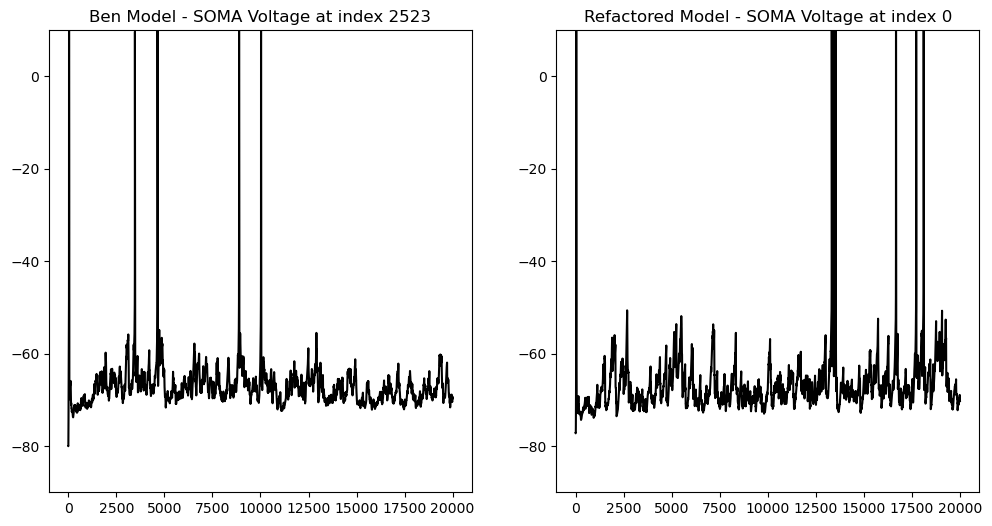

In [9]:
time_points=np.arange(0,int(parameters.h_tstop/parameters.h_dt))
time_points = time_points[0:49999]
colors = ['r*', 'g*', 'b*', 'm*', 'y*', 'k*']
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(models['ben']['v'][time_points, 2523], colors[-1].split('*')[0])
plt.ylim([-90, 10])
plt.title(f'Ben Model - SOMA Voltage at index {2523}')

plt.subplot(1, 2, 2)
plt.plot(models['refactored']['v'][time_points, 0], colors[-1].split('*')[0])
plt.ylim([-90, 10])
plt.title(f'Refactored Model - SOMA Voltage at index {0}')

plt.show()


In [10]:
soma_segs_refactored = segs_refactored[segs_refactored['Type']=='soma']

In [11]:
soma_segs_ben = segs_ben[segs_ben['Type']=='soma']

In [12]:
soma_segs_ben

,Type,Sec ID,BMTK ID,X,Distance,Section_L,Section_diam,Coord X,Coord Y,Coord Z,Elec_distance,Elec_distance_nexus,HVA_gbar,segmentID,Degrees,Elec_distanceQ
2521,soma,0,0,0.1,2.316936,23.169362,17.526643,-9.249733,-0.577674,0.0,0.998304,0.273257,0.0,0,0,None
2522,soma,0,0,0.3,6.950809,23.169362,17.526643,-4.624868,-0.288877,0.0,0.999362,0.273547,0.0,1,0,None
2523,soma,0,0,0.5,11.584681,23.169362,17.526643,-0.000010,0.000021,0.0,1.000000,0.273721,0.0,2,0,None
2524,soma,0,0,0.7,16.218553,23.169362,17.526643,4.624854,0.288824,0.0,0.999375,0.273550,0.0,3,0,None
2525,soma,0,0,0.9,20.852426,23.169362,17.526643,9.249712,0.577722,0.0,0.998281,0.273250,0.0,4,0,None


In [13]:
soma_segs_refactored

,Unnamed: 0,section,idx_in_section_type,seg_half_seg_RA,L,seg,pseg,Section_L,Section_diam,Distance,...,Sec ID,Type,Coord X,Coord Y,Coord Z,Elec_distance,Elec_distance_nexus,X,segmentID,Elec_distanceQ
0,0,soma,0,0.081276,23.169408,L5PCtemplate[0].soma[0](0.5),None,23.169408,13.471518,0.0,...,0,soma,45.725557,18.343678,-50.25,1.0,0.29059,0.5,0,None


In [14]:
len(models['ben']['v'][:,2523])

50000

In [15]:
import numpy as np

# Function to count the first occurrence of True in consecutive trues
def count_first_true(arr):
    return np.sum((arr > -10) & np.concatenate(([True], arr[:-1] <= -10)))

# Count spikes in the 'ben' model
ben_spike_count = count_first_true(models['ben']['v'][:, 2523])
ben_spike_rate = ben_spike_count / (len(models['ben']['v'][:, 2523]) / 10000)
print(f"ben firing rate {round(ben_spike_rate,3)}")

# Count spikes in the 'refactored' model
refactored_spike_count = count_first_true(models['refactored']['v'][:, 0])
refactored_spike_rate = refactored_spike_count / (len(models['refactored']['v'][:, 0]) / 10000)
print(f"refactored firing rate {round(refactored_spike_rate, 3)}")

ben firing rate 3.2
refactored firing rate 3.5


In [16]:
np.log(0.45) - 0.5 * np.log((0.35/0.45)**2 + 1)

-1.0350503441093433

Shift applied to refactored segments: X=-45.932710375104605, Y=-18.356623331705777, Z=50.25


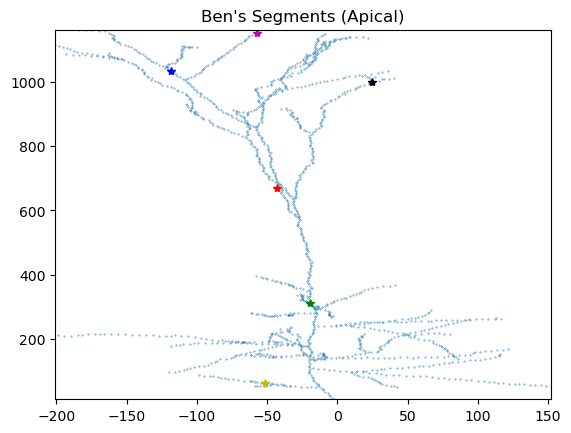

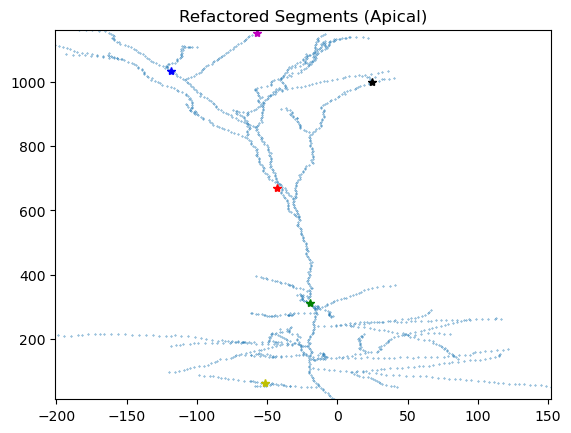

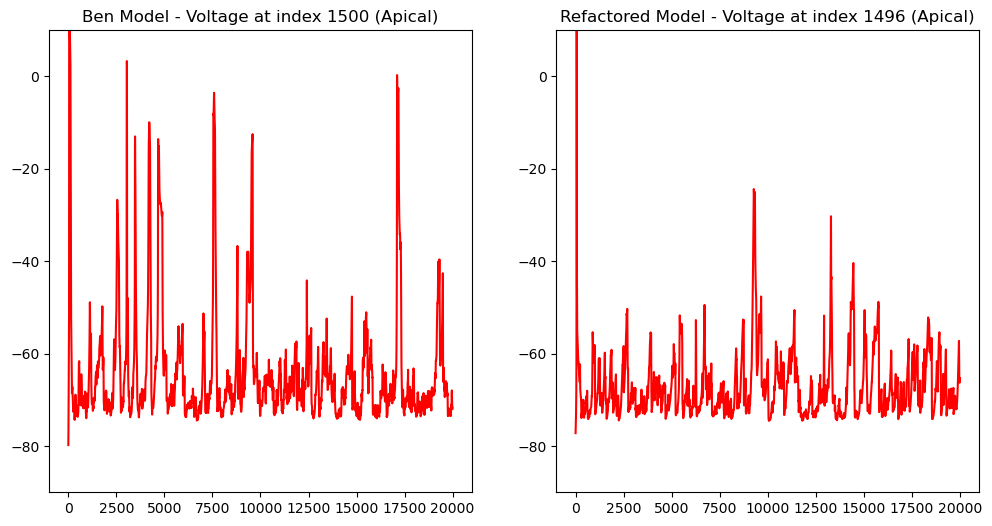

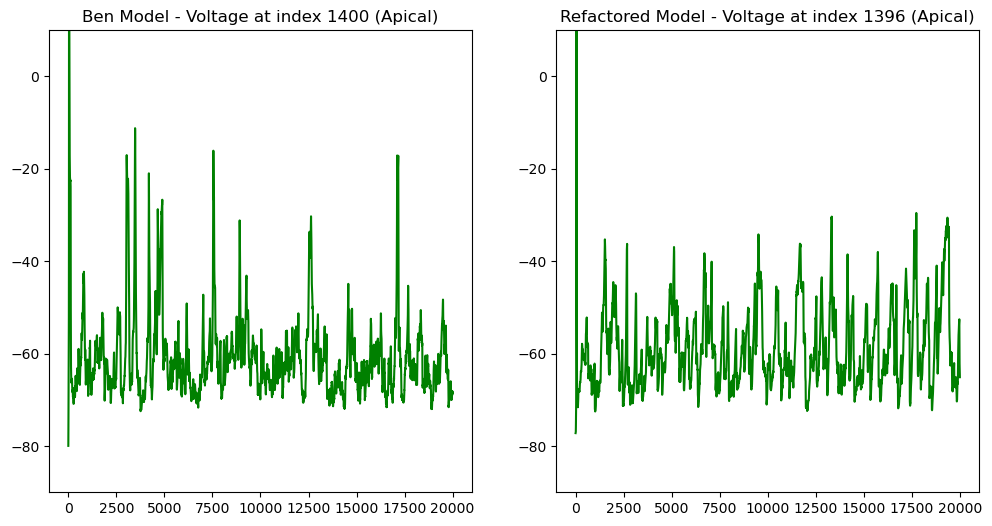

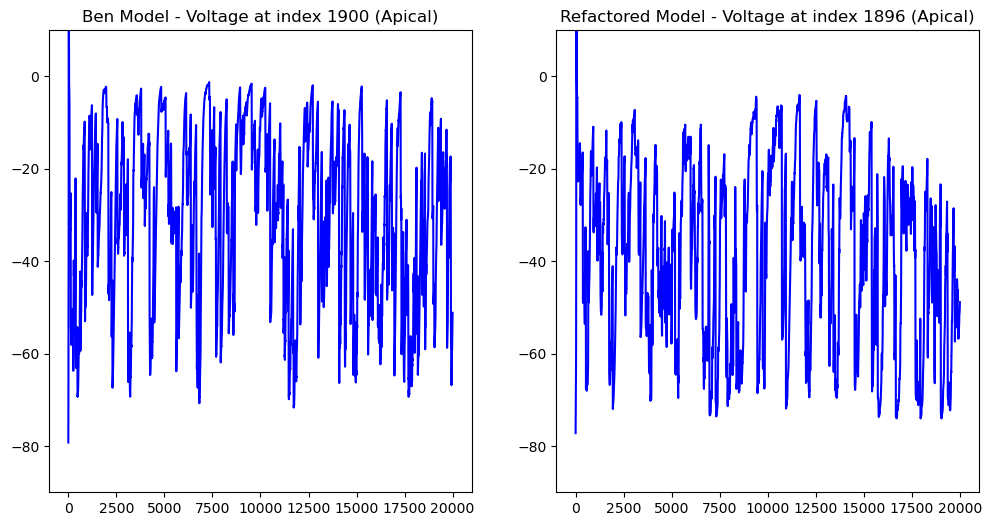

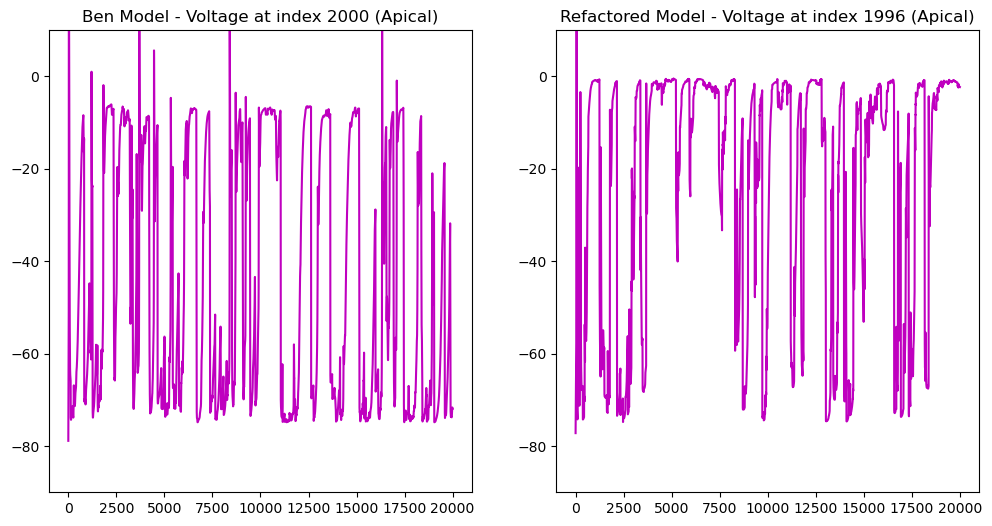

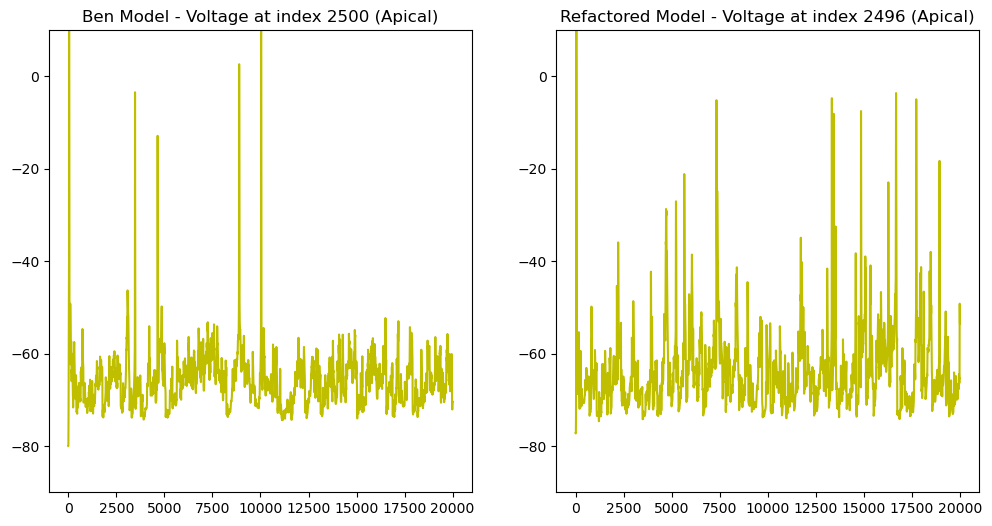

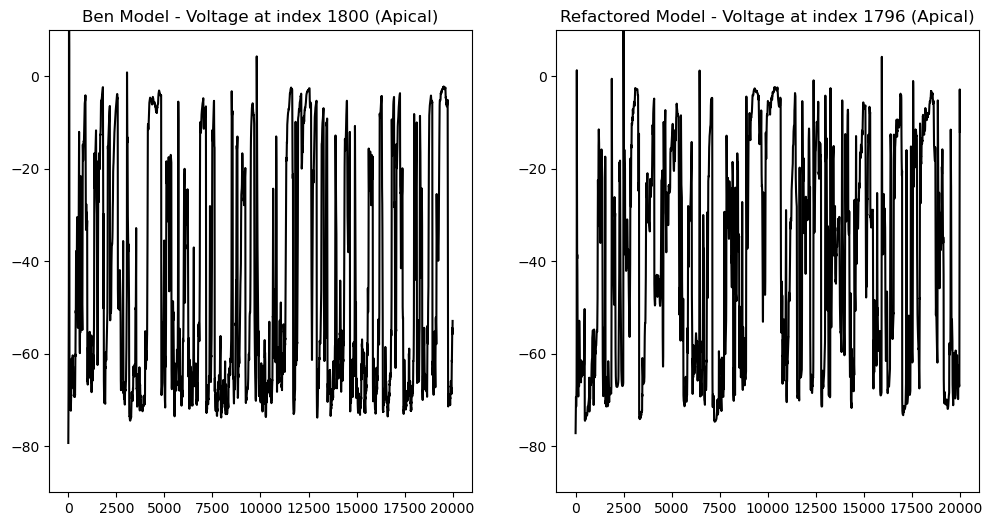

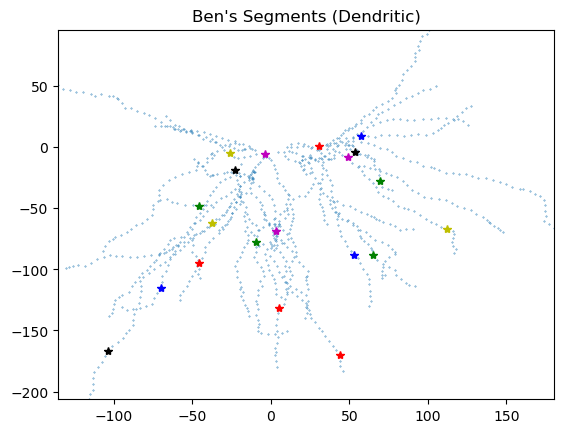

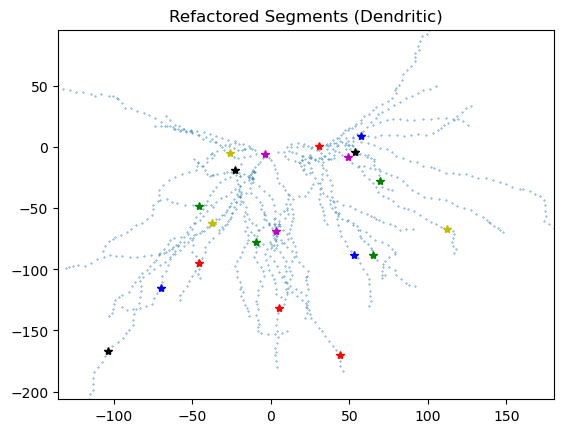

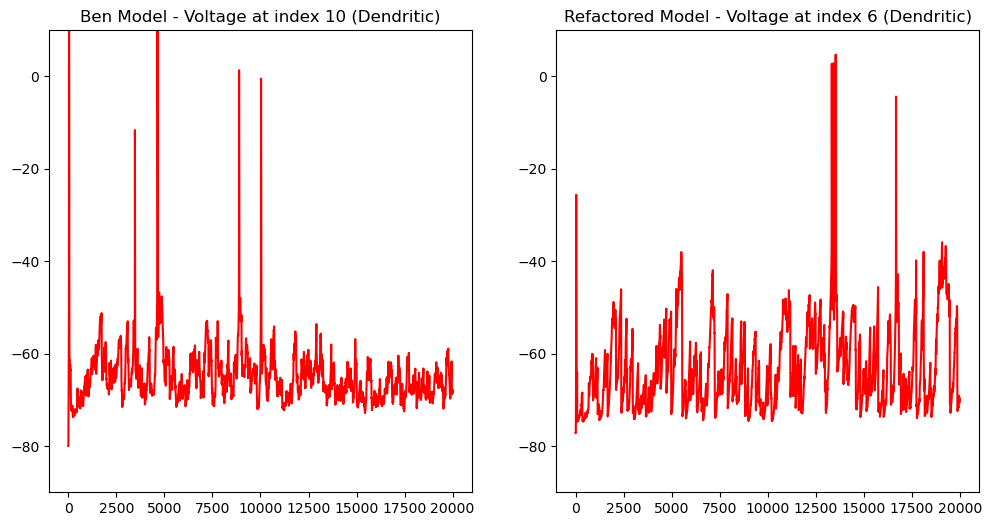

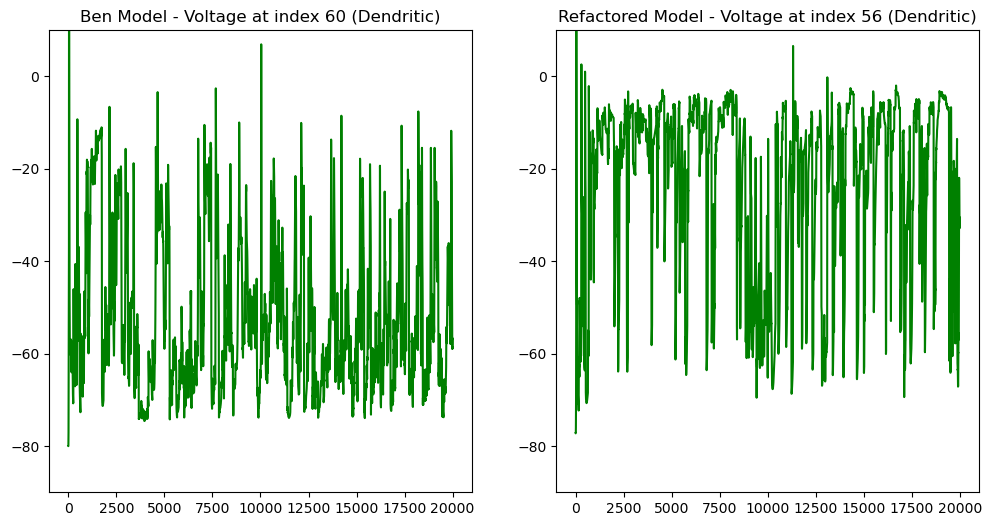

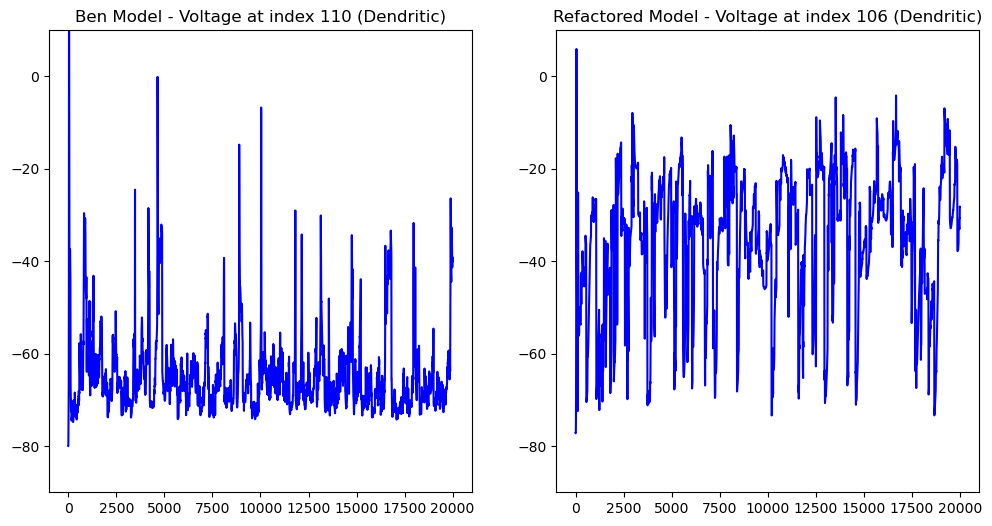

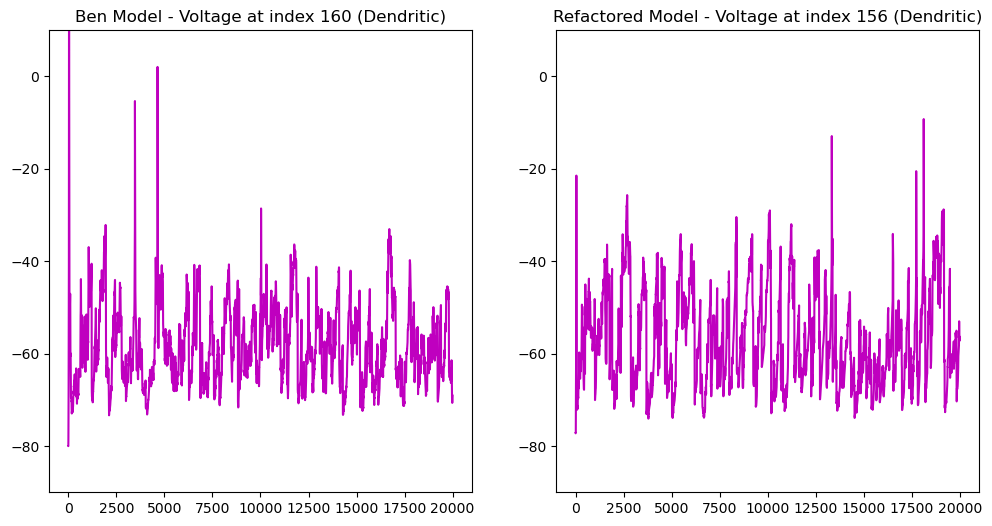

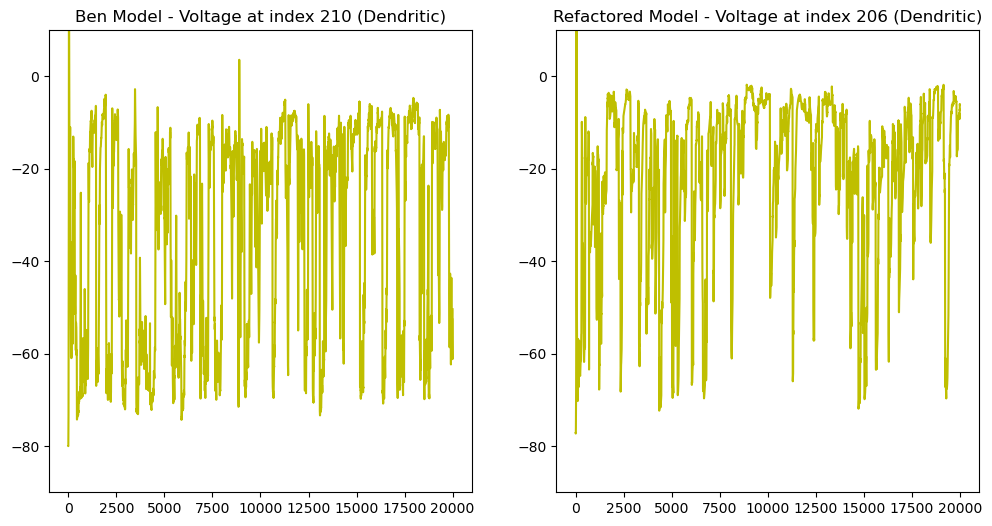

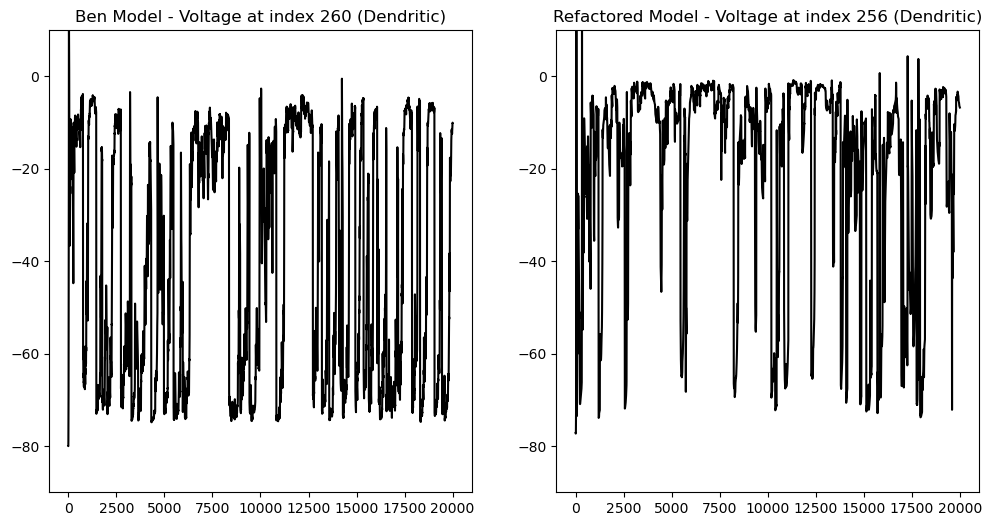

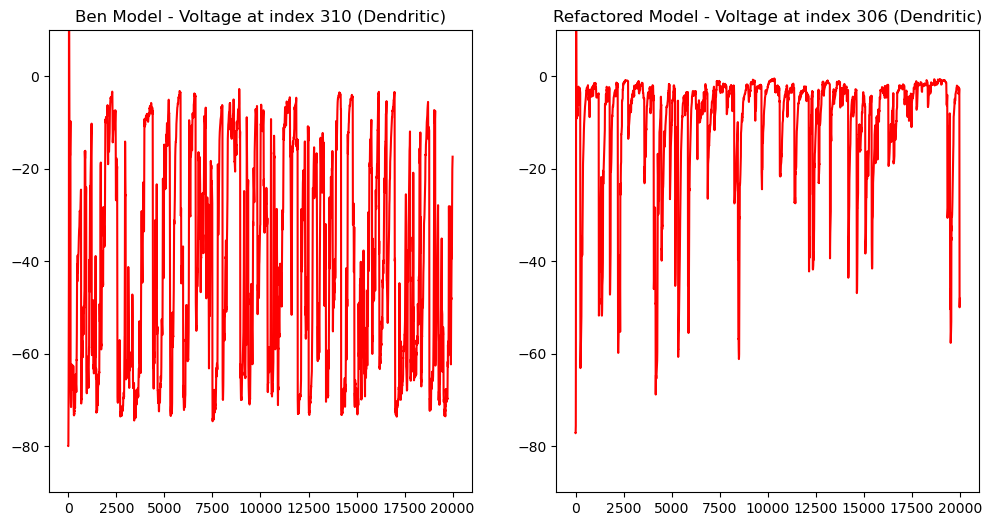

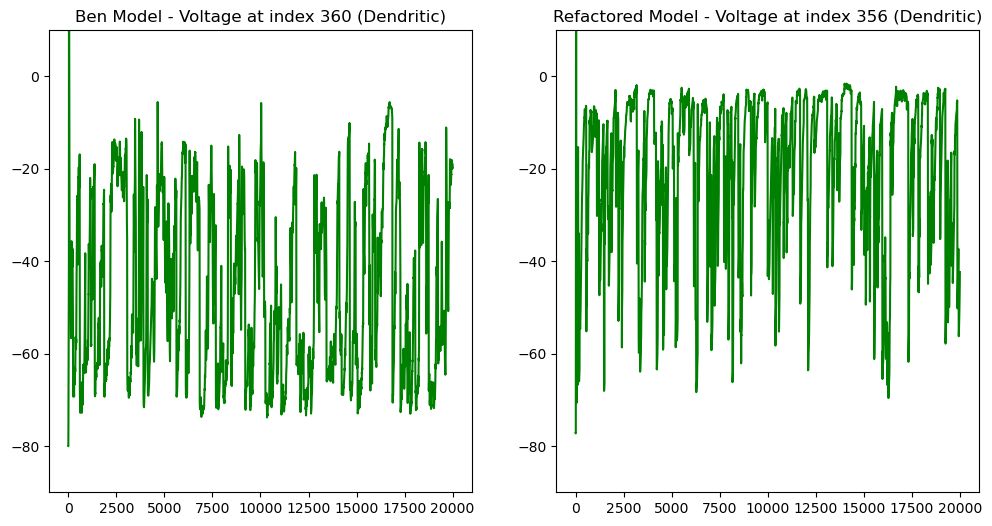

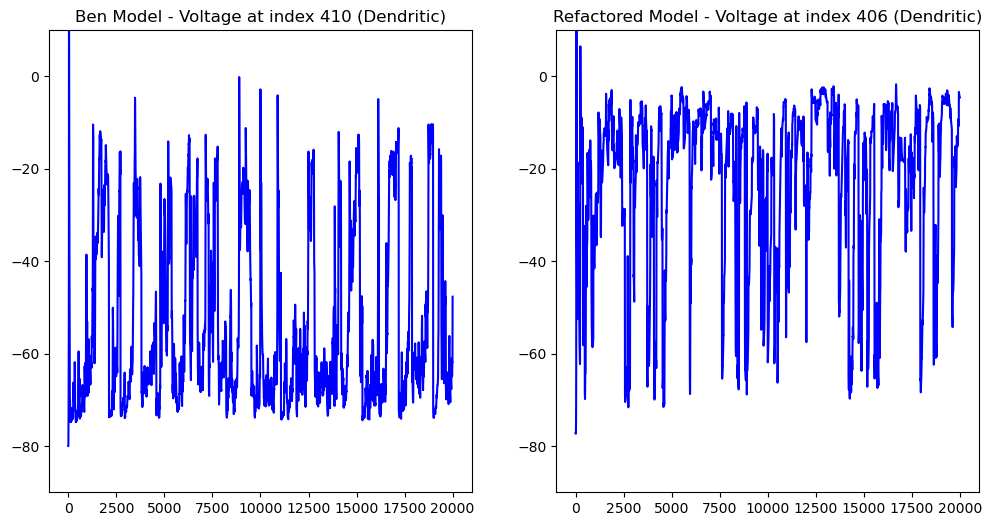

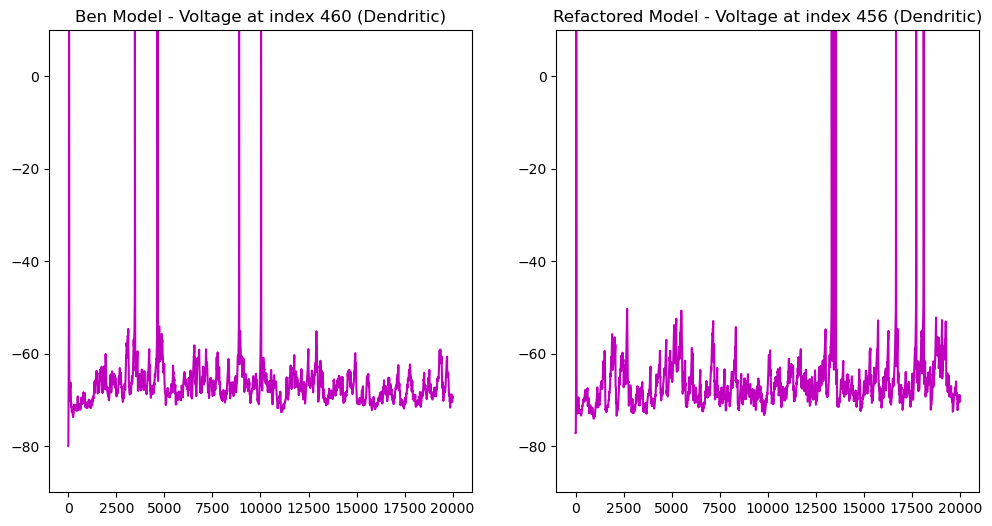

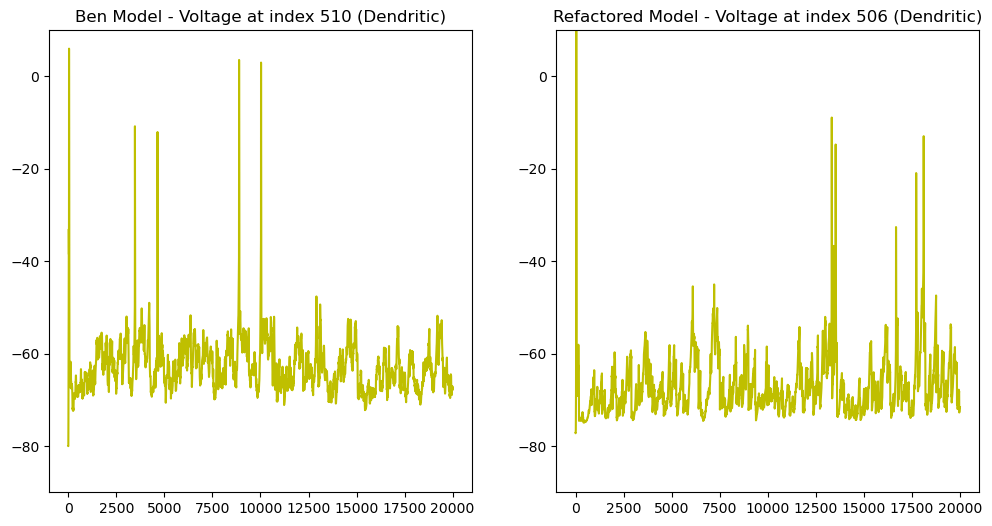

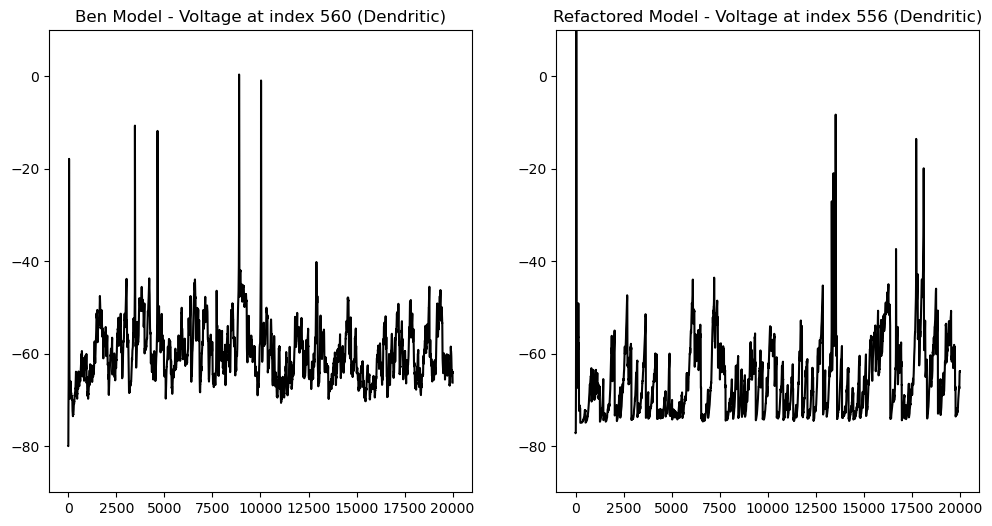

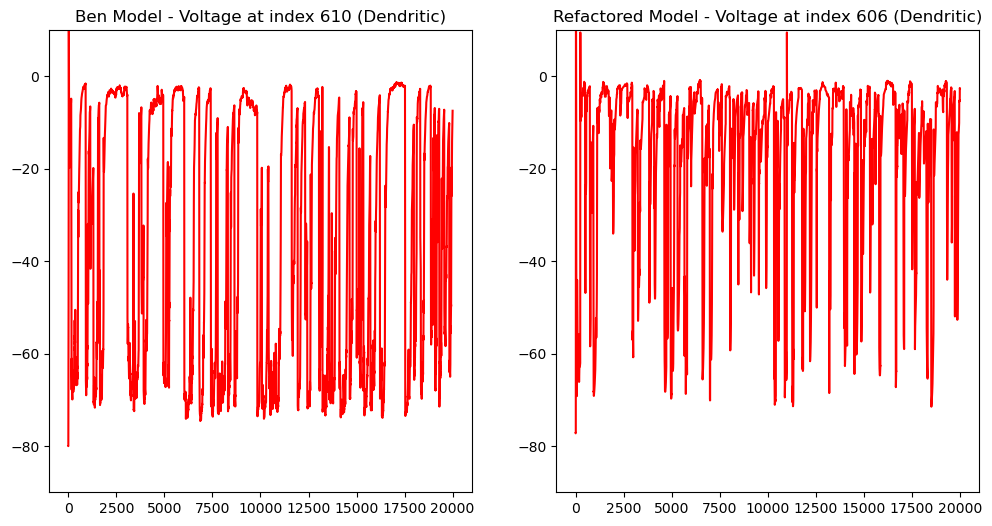

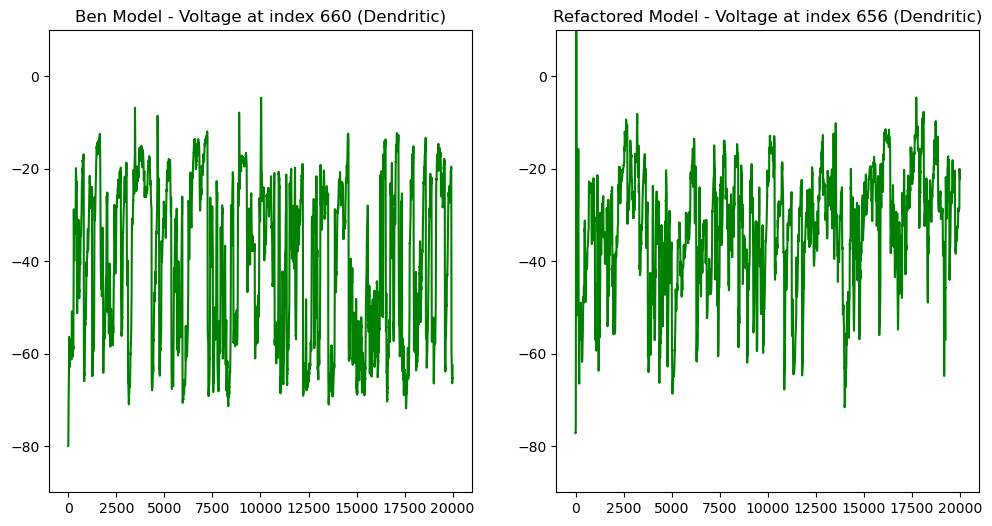

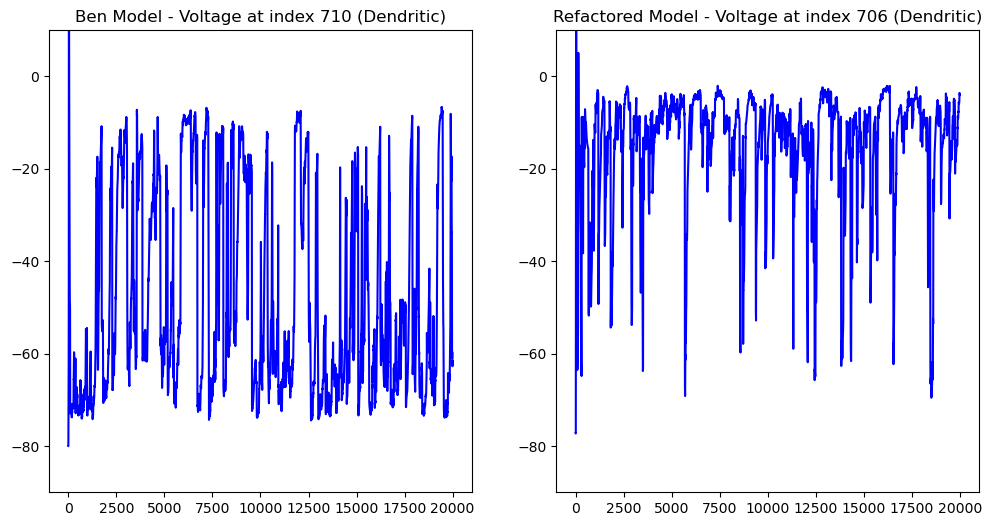

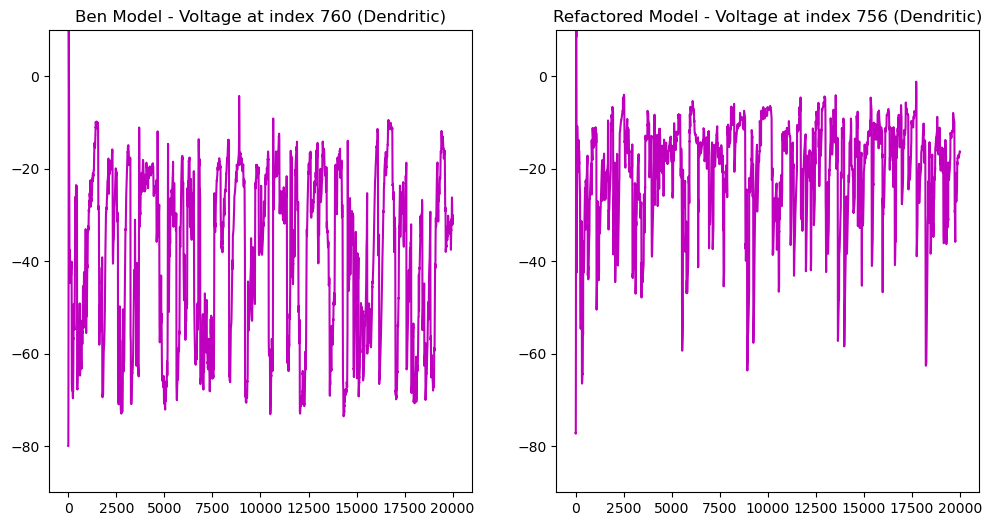

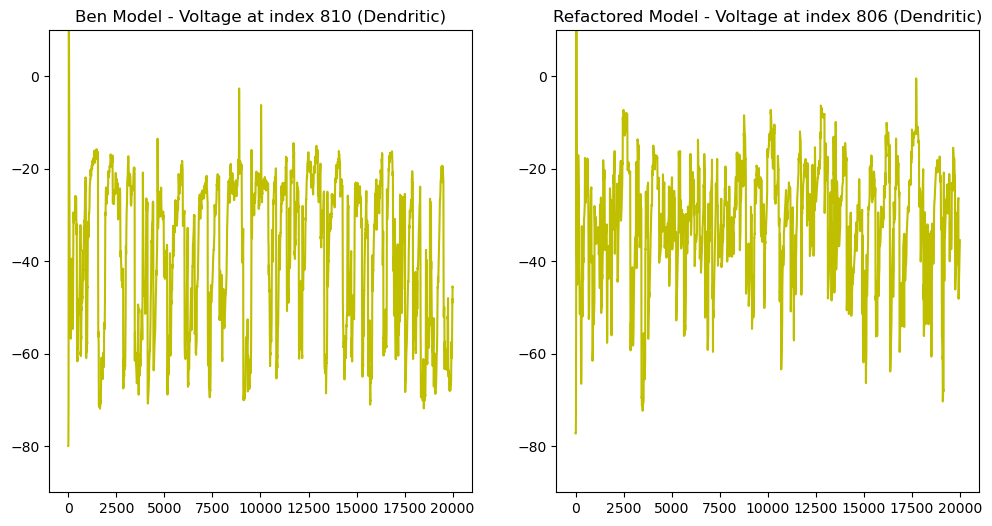

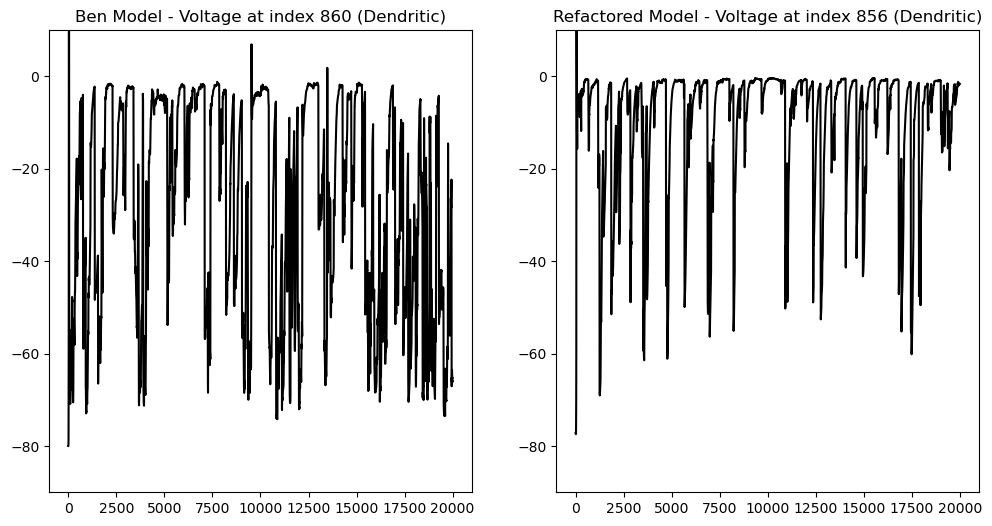

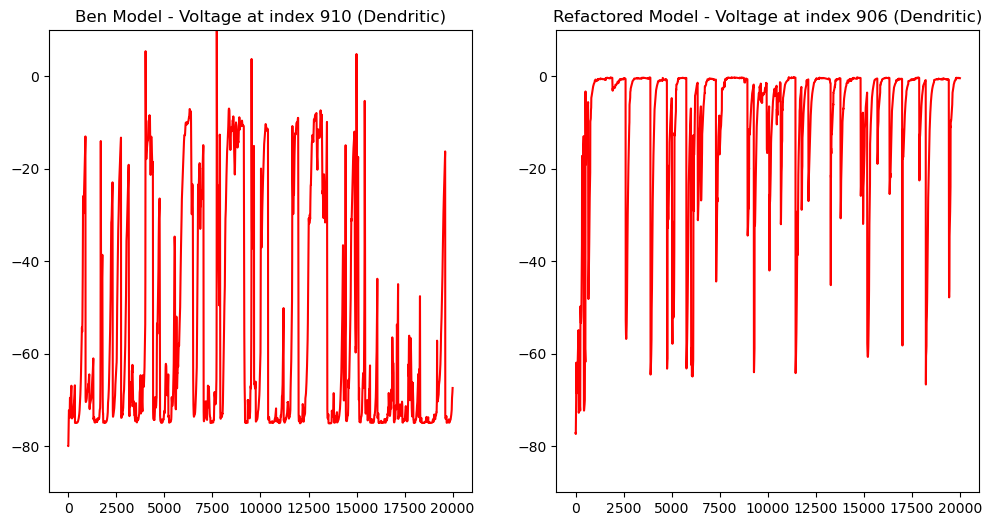

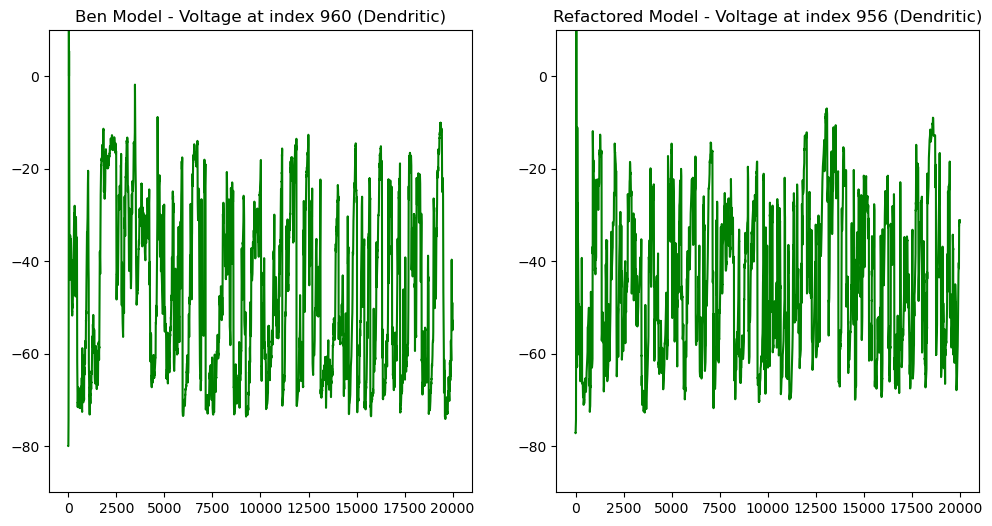

In [17]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

def calculate_shift_and_apply(ben_segs, refactored_segs):
    # Calculate the min and max for each coordinate of Ben's segments
    ben_min_x = ben_segs['Coord X'].min()
    ben_max_x = ben_segs['Coord X'].max()
    ben_min_y = ben_segs['Coord Y'].min()
    ben_max_y = ben_segs['Coord Y'].max()
    ben_min_z = ben_segs['Coord Z'].min()
    ben_max_z = ben_segs['Coord Z'].max()

    # Calculate the min and max for each coordinate of the refactored segments
    refactored_min_x = refactored_segs['Coord X'].min()
    refactored_max_x = refactored_segs['Coord X'].max()
    refactored_min_y = refactored_segs['Coord Y'].min()
    refactored_max_y = refactored_segs['Coord Y'].max()
    refactored_min_z = refactored_segs['Coord Z'].min()
    refactored_max_z = refactored_segs['Coord Z'].max()

    # Calculate the average shift needed for each axis
    shift_x = ((ben_min_x - refactored_min_x) + (ben_max_x - refactored_max_x)) / 2
    shift_y = ((ben_min_y - refactored_min_y) + (ben_max_y - refactored_max_y)) / 2
    shift_z = ((ben_min_z - refactored_min_z) + (ben_max_z - refactored_max_z)) / 2

    # Apply the shifts to the refactored segments using .loc to avoid SettingWithCopyWarning
    refactored_segs.loc[:, 'Coord X'] += shift_x
    refactored_segs.loc[:, 'Coord Y'] += shift_y
    refactored_segs.loc[:, 'Coord Z'] += shift_z

    print(f"Shift applied to refactored segments: X={shift_x}, Y={shift_y}, Z={shift_z}")
    return refactored_segs

def map_segments(ben_segs, refactored_segs):
    segment_mapping = {}

    # Loop through each segment in Ben's data
    for i, row in ben_segs.iterrows():
        ben_coords = np.array([row['Coord X'], row['Coord Y'], row['Coord Z']])
        
        # Calculate the distance from the current Ben's segment to all segments in the refactored data
        refactored_coords = refactored_segs[['Coord X', 'Coord Y', 'Coord Z']].values
        dists = distance.cdist([ben_coords], refactored_coords, 'euclidean').flatten()
        
        # Find the index of the closest segment in the refactored data
        closest_index = np.argmin(dists)
        
        # Store the mapping (Ben's segment ID -> Refactored segment ID)
        segment_mapping[row['segmentID']] = refactored_segs.iloc[closest_index]['segmentID']

    return segment_mapping

def plot_segments(ben_segs, refactored_segs, segment_mapping, special_indices, special_colors, title_suffix=""):
    # Calculate the axis limits
    all_coords_x = ben_segs['Coord X'].tolist() + refactored_segs['Coord X'].tolist()
    all_coords_y = ben_segs['Coord Y'].tolist() + refactored_segs['Coord Y'].tolist()
    x_min, x_max = min(all_coords_x), max(all_coords_x)
    y_min, y_max = min(all_coords_y), max(all_coords_y)

    for i, segs in enumerate([ben_segs, refactored_segs]):
        plt.figure()
        plt.scatter(segs['Coord X'], segs['Coord Y'], s=0.1)
        for j, ind in enumerate(special_indices):
            if i == 1:
                ind = segment_mapping[ind]
            plt.plot(segs.loc[segs.segmentID.isin([ind]), 'Coord X'], 
                     segs.loc[segs.segmentID.isin([ind]), 'Coord Y'], special_colors[j])
        
        plt.title(f"Ben's Segments {title_suffix}" if i == 0 else f"Refactored Segments {title_suffix}")
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.show()

def plot_voltage(models, segment_mapping, indices, colors, title_suffix="", time_points=time_points):
    colors = [color.split('*')[0] for color in colors]
    for i, idx in enumerate(indices):
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.plot(models['ben']['v'][time_points, idx], colors[i])
        plt.ylim([-90, 10])
        plt.title(f'Ben Model - Voltage at index {idx} {title_suffix}')
        
        plt.subplot(1, 2, 2)
        plt.plot(models['refactored']['v'][time_points, segment_mapping[idx]], colors[i])
        plt.ylim([-90, 10])
        plt.title(f'Refactored Model - Voltage at index {segment_mapping[idx]} {title_suffix}')
        
        plt.show()

# Example usage:
# Assuming segs_ben and segs_refactored are your dataframes
segs_refactored = calculate_shift_and_apply(segs_ben, segs_refactored)

# Filter for specific segment types
apic_segs_ben = segs_ben[segs_ben['Type']=='apic']
apic_segs_refactored = segs_refactored[segs_refactored['Type']=='apic']

# Calculate shifts and apply them
# apic_segs_refactored_shifted = calculate_shift_and_apply(apic_segs_ben, apic_segs_refactored)

# Map segments
apic_segment_mapping = map_segments(apic_segs_ben, apic_segs_refactored)

# Plot segments
apic_indices = [1500, 1400, 1900, 2000, 2500, 1800]
# colors = ['r*', 'g*', 'b*', 'm*', 'y*', 'k*']
# apic_indices = np.arange(1200, 2550, 50)
# apic_indices = [2400]
colors = ['r*', 'g*', 'b*', 'm*', 'y*', 'k*']* 20
plot_segments(apic_segs_ben, apic_segs_refactored, apic_segment_mapping, apic_indices, colors, title_suffix="(Apical)")

# Plot voltage
plot_voltage(models, apic_segment_mapping, apic_indices, colors, title_suffix="(Apical)")

# Now for dendritic segments
dend_segs_ben = segs_ben[segs_ben['Type']=='dend']
dend_segs_refactored = segs_refactored[segs_refactored['Type']=='dend']

# Calculate shifts and apply them
# dend_segs_refactored_shifted = calculate_shift_and_apply(dend_segs_ben, dend_segs_refactored)

# Map segments
dend_segment_mapping = map_segments(dend_segs_ben, dend_segs_refactored)

# Plot segments
# dend_indices = [10, 20, 30, 40, 50, 60]
dend_indices = np.arange(10, 1000, 50)
plot_segments(dend_segs_ben, dend_segs_refactored, dend_segment_mapping, dend_indices, colors, title_suffix="(Dendritic)")

# Plot voltage
plot_voltage(models, dend_segment_mapping, dend_indices, colors, title_suffix="(Dendritic)")


In [18]:
np.arange(0, 50000).shape

(50000,)

In [19]:
models['refactored']['v'][:, :].shape

(20001, 2511)

In [20]:
models['ben']['v'][:, :].shape

(50000, 2526)

Calculate an average error for a series of models

factor in standard deviation error

Adding soma into the calculation and factor in median

Z-score errors so that they do not need to be weighted.

Z score the mean, median, std, correlation errors

In [21]:
import os
import numpy as np
from scipy.stats import zscore, pearsonr

def subset_segments(segs, seg_type):
    return segs[segs['Type'] == seg_type]


def calculate_soma_spike_rate(v_trace):
    def count_first_true(arr):
        return np.sum((arr > -10) & np.concatenate(([True], arr[:-1] <= -10)))
    
    spike_count = count_first_true(v_trace)
    spike_rate = spike_count / (len(v_trace) / 10000)  # Assuming 10kHz sampling rate
    return spike_rate

def calculate_individual_errors(models, segment_mapping, indices):
    mean_errors = []
    std_errors = []
    median_errors = []
    corr_errors = []
    
    for idx in indices:
        # print(len(models['ben']['v'][:, idx]), len(models['refactored']['v'][:50001, segment_mapping[idx]]))
        ben_trace = models['ben']['v'][:, idx]
        refactored_trace = models['refactored']['v'][:50001, segment_mapping[idx]]
        
        ben_avg = np.mean(ben_trace)
        refactored_avg = np.mean(refactored_trace)
        
        ben_std = np.std(ben_trace)
        refactored_std = np.std(refactored_trace)
        
        ben_median = np.median(ben_trace)
        refactored_median = np.median(refactored_trace)
        
        mean_errors.append(np.abs(ben_avg - refactored_avg))
        std_errors.append(np.abs(ben_std - refactored_std))
        median_errors.append(np.abs(ben_median - refactored_median))
        
        corr_coef, _ = pearsonr(ben_trace, refactored_trace[:-1])
        corr_errors.append(1 - corr_coef)
    
    return {
        'mean': np.sum(mean_errors),
        'std': np.sum(std_errors),
        'median': np.sum(median_errors),
        'corr': np.sum(corr_errors)
    }

def calculate_soma_firing_rate_error(ben_model, refactored_model, soma_index):
    ben_soma_rate = calculate_soma_spike_rate(ben_model['v'][:, soma_index])
    refactored_soma_rate = calculate_soma_spike_rate(refactored_model['v'][:, 0])  # Assuming the first column for soma
    
    firing_rate_error = np.abs(ben_soma_rate - refactored_soma_rate)
    return firing_rate_error

def collect_errors_for_zscore(sim_directory_base, ben_model, segs_ben, segs_refactored, apic_indices, dend_indices, soma_indices):
    apic_errors = {'mean': [], 'std': [], 'median': [], 'corr': []}
    dend_errors = {'mean': [], 'std': [], 'median': [], 'corr': []}
    soma_errors = {'mean': [], 'std': [], 'median': [], 'corr': []}
    soma_firing_rate_errors = []
    sim_names = []
    
    apic_segs_ben = subset_segments(segs_ben, 'apic')
    apic_segs_refactored = subset_segments(segs_refactored, 'apic')
    dend_segs_ben = subset_segments(segs_ben, 'dend')
    dend_segs_refactored = subset_segments(segs_refactored, 'dend')
    soma_segs_ben = subset_segments(segs_ben, 'soma')
    soma_segs_refactored = subset_segments(segs_refactored, 'soma')
    
    apic_segment_mapping = map_segments(apic_segs_ben, apic_segs_refactored)
    dend_segment_mapping = map_segments(dend_segs_ben, dend_segs_refactored)
    soma_segment_mapping = map_segments(soma_segs_ben, soma_segs_refactored)
    
    for sim_name in os.listdir(sim_directory_base):
        sim_directory = os.path.join(sim_directory_base, sim_name)
        if os.path.isdir(sim_directory):
            print(f"Collecting errors for simulation: {sim_name}")
            
            models['refactored'] = {
                'v': analysis.DataReader.read_data(sim_directory, "v").T,
                'spktimes': analysis.DataReader.read_data(sim_directory, "soma_spikes")[0][:],
                'spkinds': np.sort((analysis.DataReader.read_data(sim_directory, "soma_spikes")[0][:] * 10).astype(int)),
            }
            
            apic_error = calculate_individual_errors(models, apic_segment_mapping, apic_indices)
            dend_error = calculate_individual_errors(models, dend_segment_mapping, dend_indices)
            soma_error = calculate_individual_errors(models, soma_segment_mapping, soma_indices)
            soma_firing_rate_error = calculate_soma_firing_rate_error(models['ben'], models['refactored'], soma_indices[0])
            
            for key in apic_errors.keys():
                apic_errors[key].append(apic_error[key])
                dend_errors[key].append(dend_error[key])
                soma_errors[key].append(soma_error[key])
                
            soma_firing_rate_errors.append(soma_firing_rate_error)
            sim_names.append(sim_name)

    return apic_errors, dend_errors, soma_errors, soma_firing_rate_errors, sim_names

def find_best_simulation_with_zscore(sim_directory_base, ben_model, segs_ben, segs_refactored, apic_indices, dend_indices, soma_indices):
    apic_errors, dend_errors, soma_errors, soma_firing_rate_errors, sim_names = collect_errors_for_zscore(
        sim_directory_base, ben_model, segs_ben, segs_refactored, apic_indices, dend_indices, soma_indices
    )
    
    total_z_scores = np.zeros(len(sim_names))
    
    for key in apic_errors.keys():
        apic_z_scores = zscore(apic_errors[key])
        dend_z_scores = zscore(dend_errors[key])
        soma_z_scores = zscore(soma_errors[key])
        
        # Check for NaN in the z-scores and print the simulation name and error type
        if np.isnan(apic_z_scores).any():
            print(f"NaN found in apic errors for simulation {key} at indices: {np.where(np.isnan(apic_z_scores))}")
        if np.isnan(dend_z_scores).any():
            print(f"NaN found in dend errors for simulation {key} at indices: {np.where(np.isnan(dend_z_scores))}")
        if np.isnan(soma_z_scores).any():
            print(f"NaN found in soma errors for simulation {key} at indices: {np.where(np.isnan(soma_z_scores))}")
        
        # Skip adding to total_z_scores if NaN is present
        if not (np.isnan(apic_z_scores).any() or np.isnan(dend_z_scores).any() or np.isnan(soma_z_scores).any()):
            total_z_scores += 2*apic_z_scores + 2*dend_z_scores + soma_z_scores
    
    soma_firing_rate_z_scores = zscore(soma_firing_rate_errors)
    
    # Check for NaN in soma firing rate z-scores
    if np.isnan(soma_firing_rate_z_scores).any():
        print(f"NaN found in soma firing rate errors at indices: {np.where(np.isnan(soma_firing_rate_z_scores))}")
    else:
        total_z_scores += soma_firing_rate_z_scores  # Weighting soma firing rate error more heavily
    
    # Find the best simulation index and simulation name
    best_index = np.argmin(total_z_scores)
    best_simulation = sim_names[best_index]
    best_error = total_z_scores[best_index]
    
    return best_simulation, best_error

# Define the base directory containing all refactored simulation directories
sim_directory_base = '2024-09-16-09-35-21-TuningBenInhSynapses'#'2024-08-29-11-36-26-TuningSynapses_AfterUpdateExcRates_finalAdjustments'#'2024-08-19-15-18-27-TuningSynapses_finalSims/'

# Define the apical, dendritic, and soma segments for inspecting
apic_indices = np.arange(1100, 2600, 100)#[1500, 1400, 1900, 2000, 2500, 1800]
dend_indices = np.arange(10, 160, 10)#[10, 20, 30, 40, 50, 60]
soma_indices = [2]

# Find the best simulation using z-scored errors
best_simulation, best_error = find_best_simulation_with_zscore(
    sim_directory_base,
    models['ben'],
    segs_ben,
    segs_refactored,
    apic_indices,
    dend_indices,
    soma_indices
)


FileNotFoundError: [Errno 2] No such file or directory: '2024-09-16-09-35-21-TuningBenInhSynapses'

In [ ]:
'2024-09-09-11-26-53-TuningBenInhSynapses/Complex_InhGmaxApic5.9_InhGmaxDend0.003_SomaGmax0.0011_ExcGmax-1.0351_Np1000'

In [ ]:
best_simulation

In [ ]:
best_error

In [ ]:
def log_norm_dist(gmax_mean, gmax_std, gmax_scalar, size, clip):
	val = np.random.lognormal(gmax_mean, gmax_std, size)
	s = gmax_scalar * float(np.clip(val, clip[0], clip[1]))
	return s

mean = np.random.lognormal(np.log(0.45) - 0.5 * np.log((0.35 / 0.45) ** 2 + 1))
std = np.sqrt(np.log((0.35/0.45)**2 + 1))
size = 1000

vals = [log_norm_dist(mean, std, gmax_scalar=1, size=1, clip = [0, 5]) for i in range(1000)]

In [ ]:
np.mean(vals)